# **Aprendizagem por Reforço**

A prendizado para tomar uma sequência de decisões até atingir uma meta sem ter parâmetros de referência.

O aprendizado se dá por tentativa e erro.

O agente percebe se está certo quando recebe uma recompensa e se está errado quando recebe uma punição.

**Algumas aplicações**

- Jogos
- Robótica
- Mercado Financeiro
- Aperfeiçoamento de carros autônomos
- Precos diâmicos e personalizados
- Definição de estratégias para tratamento de doenças

**Nomenclaturas**
1. **Agente:** Entidade que irá aprender (software e/ou hardware)
2. **Ambiente:** espaço de ação do agente (físico ou virtual)
3. **Estado (s):** situação atual do agente e ambiente.
4. **Política (π):** estratégia para a próxima ação.
5. **Recompensa (r):** referência para o agente sobre a sua ação.


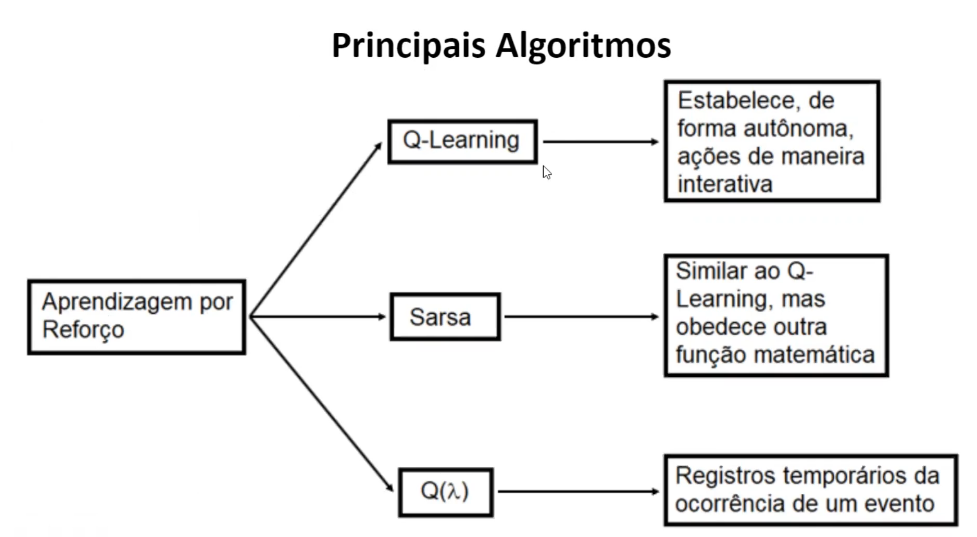

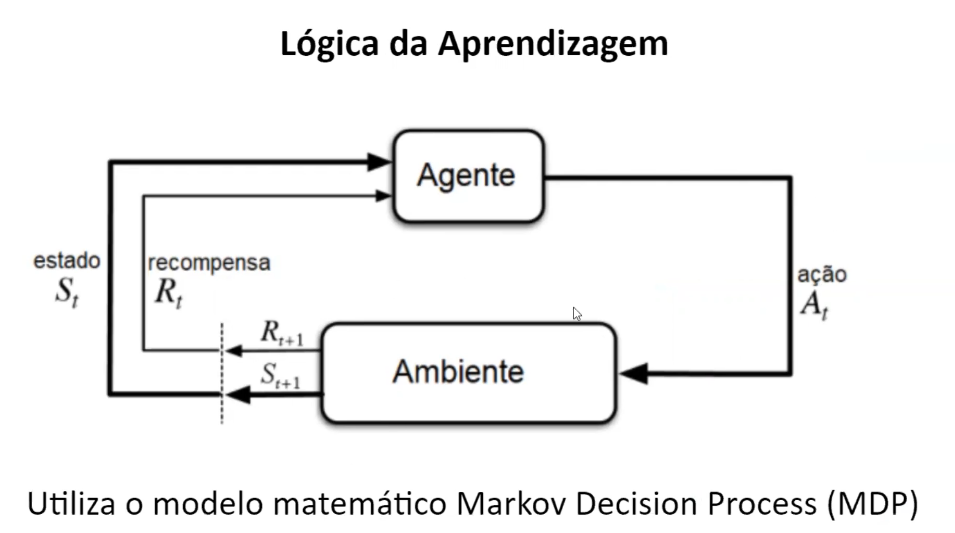

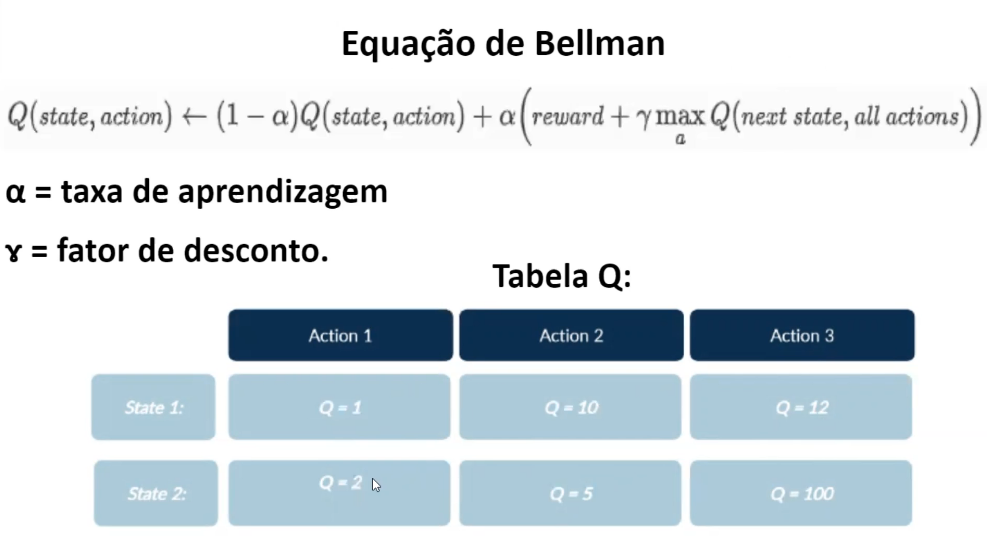

https://gym.openai.com/ 

https://gym.openai.com/envs/Taxi-v3/ 

**Links de referência**

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/ 

https://medium.com/turing-talks/aprendizado-por-refor%C3%A7o-4-gym-d18ac1280628 

**Instalando a Biblioteca GYM**

In [22]:
!pip install cmake 'gym[atari]' scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import gym

**Carregando e renderizando o ambiente**

In [31]:
env = gym.make("Taxi-v3").env

In [34]:
env.render()

ResetNeeded: ignored

env.reset: redefine o ambiente e retorna um estado inicial aleatório.

env.step(action): Apresenta os passos de ação.


In [33]:
# Print no espaço de ação discreto e no espaço de estado discreto
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


**ESPAÇO DE ESTADO**

Espaço de estado da grade: 5x5 = 25

Espaço posição do passageiro: 5 (quatro pontos externos e um dentro do taxi)

Espaço de posição de embargue/desembarque (destino): 4

Total: 5x5x5x4 = 500 espaços de estado. 

**ESPAÇO DE AÇÃO**

O algoritmo escolherá um número de ação de 0 a 5, onde:

0 = sul

1 = norte

2 = leste

3 = oeste

4 = embarque

5 = desembarque

**Colocando o taxi na linha 3, coluna 1, nosso passageiro no local 2 e nosso destino é o local 0.**

In [36]:
state = env.encode(3, 1, 2,0) # (linha do taxi, coluna do taxi, índice do passageiro, índice do destino)
print("State:", state)

env.s = state
env.render()

State: 328


Táxi amarelo é sem passageiro e verde é com passageiro.

A barra ("|") representa uma parede que o táxi não pode atravessar.

R, G, Y, B são os possíveis locais de coleta e destino. A **letra azul** representa o local de **embargue** do passageiro e a **letra roxa** é o **desembargue** do passageiro.

Recompensas (Já definidas na biblioteca):

+20 para um desembarque correto.

-10 para um embarque ou desembarque incorreto.

-1 para ações que não sejam as duas anteriores.

In [37]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [38]:
import numpy as np
import random
from IPython.display import clear_output

In [39]:
tabela_q = np.zeros([env.observation_space.n, env.action_space.n]) #iniciando a tabela Q

In [40]:
tabela_q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [41]:
tabela_q.shape

(500, 6)

**TREINAMENTO DO ALGORITMO**

In [42]:
# Não existem valores "certos" ou "errados", é por tentativa e erro.
alpha = 0.1
gamma = 0.6
epsilon = 0.1 # Determina a chance do agente tomar uma ação aleatória, nesse caso a chance é de 10%

for i in range(1, 200001):
    estado = env.reset()

    episodios, penalidades, recompensa = 0, 0, 0 
    terminado = False
    
    while not terminado:
        if random.uniform(0, 1) < epsilon: # Decidindo se será tomada uma ação aleatória ou se seguirá a política da tabela-q
            acao = env.action_space.sample() 
        else:
            acao = np.argmax(tabela_q[estado]) 

        proximo_estado, recompensa, terminado, info = env.step(acao) 
        
        valor_antigo = tabela_q[estado, acao]
        proximo_max = np.max(tabela_q[proximo_estado])
        
        # Atualizando o valor de q a partir da equação de Bellman
        valor_novo = (1 - alpha) * valor_antigo + alpha * (recompensa + gamma * proximo_max) 
        tabela_q[estado, acao] = valor_novo # Colocando este valor na tabela-q

        if recompensa == -10: # Contabilizando os embarques/desembarques errados
            penalidades += 1

        estado = proximo_estado
        episodios += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episódios: {i}")
        
print("Treinamento terminado.\n")

Episódios: 200000
Treinamento terminado.



**AVALIAÇÃO DO ALGORITMO**

In [43]:
total_penalidades = 0
episodios = 100
frames = []

for i in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(tabela_q[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

Episódios 100
Penalidades 0


/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


In [ ]:
from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(.2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Estado 246
Ação 2
Recompensa -1
